# Decision Tree

Slides: https://www.beautiful.ai/player/-MAZKJLOanatNnvVZd5j/FTMLE-52-Tom

In [1]:
#@title Import libraries {display-mode: "form"}

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def draw_vectors(vectors, origin='origin', cmap=None, labels=None):
    if cmap:
        colors = cmap
    else:
        colors = ['#3498db', '#e67e22', '#f1c40f', '#2ecc71', '#1abc9c']

    if origin == 'origin':
        x_0 = np.zeros(len(vectors))
        y_0 = np.zeros(len(vectors))
    else:
        x_0, y_0 = origin[:, 0], origin[:, 1]
    ax = plt.gca()
    if labels:
        for i in range(len(vectors)):
            ax.text(vectors[i][0]+0.1, vectors[i][1]+0.2, labels[i],
                    {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
                    'bbox': dict(boxstyle="round", fc="white", alpha=0)})
    ax.quiver(x_0, y_0, vectors[:, 0], vectors[:, 1],
              angles='xy', scale_units='xy', scale=1, color=colors)

def projection(x, y, draw_vector=True):
    color = '#95a5a6'
    ax = plt.gca()
    dot_product = np.dot(x, y)
    y_norm = y / np.dot(y, y)
    x_projection = y_norm * dot_product
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c=color)
    if draw_vector:
        draw_vectors(np.array([x_projection]), cmap=['#bdc3c7'])

def determinant_area(i_hat, j_hat):
    ax = plt.gca()
    sum_vector = i_hat + j_hat
    polygon = plt.Polygon([(0, 0), i_hat, sum_vector, j_hat], fill=True, color='#f39c12', alpha=0.3)
    print('Determinant Area:', np.abs(i_hat[0]*j_hat[1] - i_hat[1]*j_hat[0]))
    ax.add_line(polygon)
    
def projection_onto_H(x, w, b):
    ax = plt.gca()
    alpha = (np.dot(x, w) + b) / np.dot(w, w)
    d = alpha * w
    x_projection = x - d
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c='#95a5a6')
    
def plot_margins(X, y, w, b):
    ax = plt.gca()
    gamma = np.abs(np.dot(X, w) + b) / np.sqrt(np.dot(w, w))
    x_pos = X[y==1][np.argmin(gamma[y == 1])]
    x_neg = X[y==0][np.argmin(gamma[y == 0])]
    d_pos = gamma[y==1][np.argmin(gamma[y == 1])]
    d_neg = gamma[y==0][np.argmin(gamma[y == 0])]
    
    ax.scatter([x_pos[0], x_neg[0]],[x_pos[1], x_neg[1]], s=150, linewidth=2, facecolor='none', edgecolors='#2c3e50')
    projection_onto_H(x_pos, w, b)
    projection_onto_H(x_neg, w, b)
    ax.set_title(f'Margin Class +1: {d_pos:.3f}, Class -1: {d_neg:.3f}', fontsize=24)
    
def plot_svc(model, plot_support=True):
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    
    # create grid (coordinate system - x and y) to evaluate model
    x = np.linspace(xlim[0], xlim[1], 40)
    y = np.linspace(ylim[0], ylim[1], 40) 
    X, Y = np.meshgrid(x, y)
    flatten_X = X.ravel() 
    flatten_Y = Y.ravel()
    xy = np.vstack([flatten_X, flatten_Y]).T 
    Z = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins.
    ax.contour(X, Y, Z, colors='k', # draw filled contours
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    
    # plot circle around the support vectors returned by fitted SVC model
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1],
                   s=150, linewidth=2, facecolors='none', edgecolors='k')
        
def plot_hyperplane(w, b):
    ax = plt.gca()
    draw_vectors(np.array([w]), origin=np.array([[(-b/w[0]), 0]]))
    x_1 = np.linspace(-8, 8, 100)
    ax.plot(x_1, (-w[0]/w[1])*x_1 + (-b/w[1]))

def visualize_classifier(model, X, y, ax=None, cmap='viridis'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Decision Tree

Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly. We use the training data to build a tree structure that recursively divides the space into regions with similar labels. The root node of the tree represents the entire data set. This set is then split roughly in half along one dimension by a simple threshold $t$. The threshold $t$ and the dimension are chosen so that the resulting child nodes are purer in terms of class membership. We keep splitting the nodes until if the data points contain more than one label or can not split any further.

**Bad news**: Finding a minimum size tree is pretty hard

**Good news**: we can approximate it with a greedy strategy. We keep splitting the data to minimize an **impurity function**.

**ID3-Algorithms**: Try all features and all posible splits. Pick the split that minimizes impurity, e.g. with feature $x_f$ with threshold $t$, a split is defined as

$$
\begin{bmatrix}
D^L=\left \{ (x,y)\in D: x_f\leq t \right \}\\ 
D^R=\left \{ (x,y)\in D: x_f> t \right \}
\end{bmatrix}
$$

### Examples

**Titanic dataset**

In [3]:
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv')
# Data manipulation
titanic.fillna(titanic['Age'].mean(), inplace=True)
titanic.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True)

X = titanic[['Pclass', 'Sex', 'Age', 'FamilySize']]
y = titanic[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

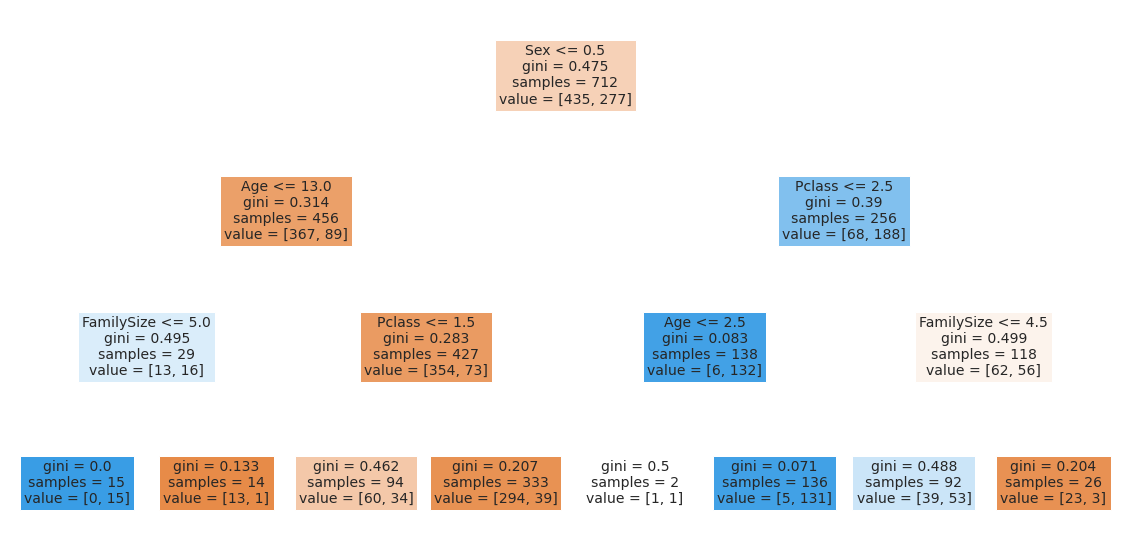

In [9]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

clf = DecisionTreeClassifier(max_depth=3, criterion='gini').fit(X_train, y_train)  # criterion = 'gini' or 'entropy'

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, fontsize=14,feature_names= ['Pclass', 'Sex', 'Age', 'FamilySize'])
plt.show()

In [6]:
# D_L = 456
# D_R = 256
gini_t = (456/712) * 0.314 + (256/712) * 0.39
print(gini_t)

0.34132584269662924


In [5]:
# k could be 1 and 2
# |D| = 712
# |D_survived| = 277
# |D_not_s| = 435
p1 = 435/712
p2 = 277/712
gini = p1*(1-p1) + p2*(1-p2)
print(gini)

0.4753779510162858


**Random 2-dimensional data**

In [14]:
y[:10]

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3])

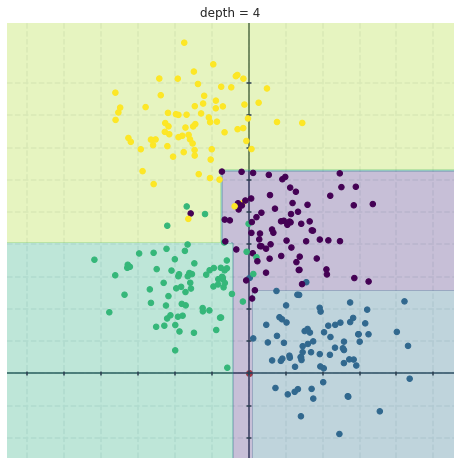

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-6, 6]), y_lim=np.array([-2, 10]))

depth = 4
clf = DecisionTreeClassifier(max_depth=depth)
visualize_classifier(clf, X, y)
plt.title('depth = {0}'.format(depth))

plt.show()

Notice that as the depth increases, we tend to get very strangely shaped classification regions. 

In [17]:
from ipywidgets import interact

def plot_tree_interactive(X, y, max_depth=5):
    def interactive_tree(depth=max_depth):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        plt.figure(figsize=(8, 8))
        draw_grid(x_lim=np.array([-6, 6]), y_lim=np.array([-2, 10]))

        visualize_classifier(clf, X, y)

    return interact(interactive_tree, depth=range(1, max_depth+1))

plot_tree_interactive(X, y, 15)

interactive(children=(Dropdown(description='depth', index=14, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …

<function __main__.plot_tree_interactive.<locals>.interactive_tree>

### Max depths of Decision Tree - Overfitting and Underfitting

In [18]:
from sklearn.metrics import accuracy_score,mean_squared_error

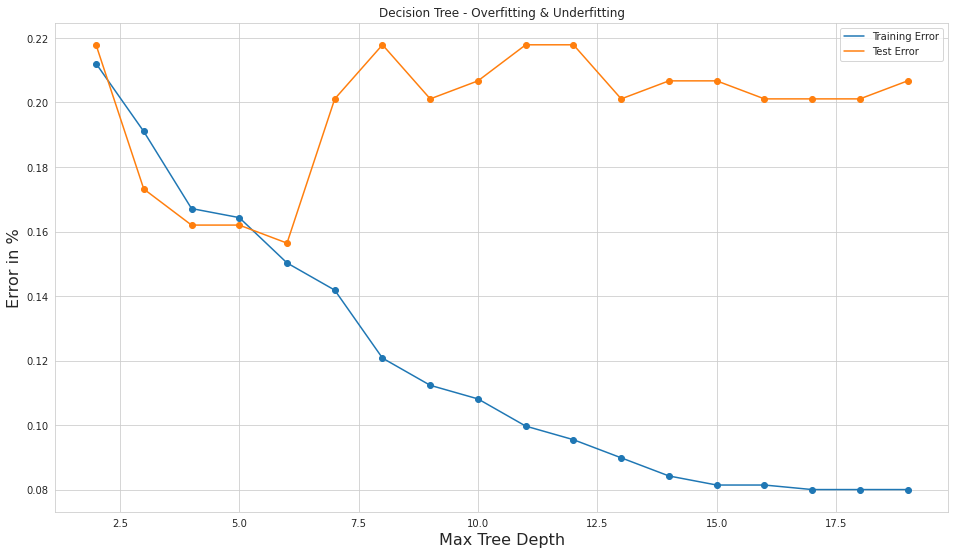

In [19]:
max_depths = np.arange(2, 20)
train_errors = []
test_errors = []
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy').fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, dt_clf.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, dt_clf.predict(X_test)))

plt.figure(figsize=(16, 9))
plt.scatter(max_depths, train_errors)
plt.plot(max_depths, train_errors, label='Training Error')
plt.scatter(max_depths, test_errors)
plt.plot(max_depths, test_errors, label='Test Error')
plt.legend()
plt.title('Decision Tree - Overfitting & Underfitting')
plt.xlabel('Max Tree Depth', fontsize=16)
plt.ylabel('Error in %', fontsize=16)
plt.show()

Question: Look at hyperparameter ``min_sample_leaf`` in DecisionTree algorithm on sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and explain what happens if you increase or decrease this hyperparameter


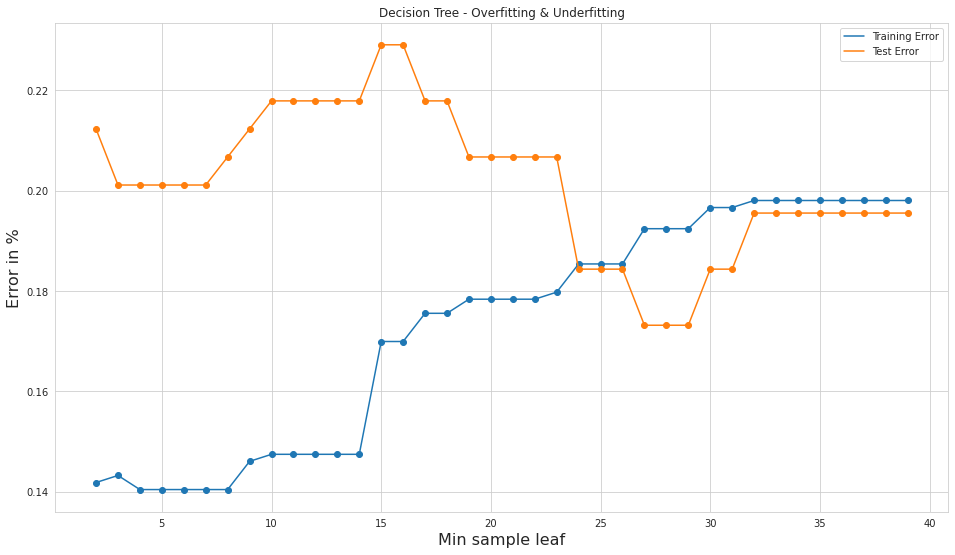

In [20]:
train_errors = []
test_errors = []
a_range = np.arange(2, 40)
for i in a_range:
    dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=i, criterion='gini').fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, dt_clf.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, dt_clf.predict(X_test)))

plt.figure(figsize=(16, 9))
plt.scatter(a_range, train_errors)
plt.plot(a_range, train_errors, label='Training Error')
plt.scatter(a_range, test_errors)
plt.plot(a_range, test_errors, label='Test Error')
plt.legend()
plt.title('Decision Tree - Overfitting & Underfitting')
plt.xlabel('Min sample leaf', fontsize=16)
plt.ylabel('Error in %', fontsize=16)
plt.show()

Some advantages of decision trees are:

- Simple to understand and to interpret

- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Does this module support missing values?

- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

- Able to handle both numerical and categorical data.

- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

# Metric

## Gini impurity for classification

Gini impurity is a measure of **how often a randomly chosen element from the set would be incorrectly labeled** if it was randomly labeled **according to the distribution of labels in the subset**.
- A measure of label's prediction uncertainty
- It reaches its minimum (zero) when all cases in the node fall into a single target category.

Given dataset: $D=\left \{ \left ( \mathbf{x}_1,y_1 \right ),\dots,\left ( \mathbf{x}_m,y_m \right ) \right \}, y_i\in\left \{ 1,\dots,c \right \}$, where $c$ is the number of classes.

Let $D_k\subseteq D$, where $D_k=\left \{ \left ( \mathbf{x},y \right )\in D:y=k \right \}$, so $D=D_1\cup \dots \cup D_c$

Let 

$$
p_k=\frac{\left | D_k \right |}{\left | D \right |}\leftarrow \textrm{fraction of inputs in } D \textrm{ with label } k
$$

Then, the Gini impurity of a leaf is

$$
G(D)=\sum_{k=1}^{c}p_k(1-p_k)
$$

Gini impurity of a tree:

$$
G^T(D)=\frac{\left | D_L \right |}{\left | D \right |}G^T(D_L)+\frac{\left | D_R \right |}{\left | D \right |}G^T(D_R)
$$

where:
* $\left ( D=D_L\cup D_R \right )$
* $D_L\cap D_R=\varnothing$

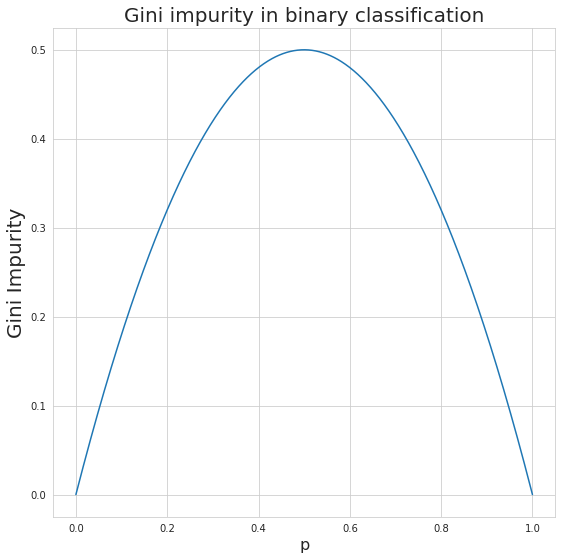

In [21]:
p = np.linspace(0, 1, 1000)
G = 2*p*(1-p)

plt.figure(figsize=(9, 9))
plt.plot(p, G)
plt.title('Gini impurity in binary classification', fontsize=20)
plt.xlabel('p', fontsize=16)
plt.ylabel('Gini Impurity', fontsize=20)
plt.show()

![](https://miro.medium.com/max/602/0*Nsuwaq2Padpbdz9Y.png)

### Entropy

Let $p_1,\dots,p_k$ be defined as before. Entropy is defined as below:

$$
H(s) = -\sum_{k}p_klog_2(p_k)
$$

Entropy over tree:

$$
H(D)= \frac{\left | D_L \right |}{\left | D \right |} H(D^L)+ \frac{\left | D_R \right |}{\left | D \right |}H(D^R)
$$

The entropy is also used to measure [Information Gain](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees), which is the difference in entropy from before to after the set $D$ is split on an attribute $x_f$. In other words, how much uncertainty in $D$ was reduced after the splitting.

## Summary

In [2]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Get Data
titanic = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv')
#   Data manipulation
titanic.fillna(titanic['Age'].mean(), inplace=True)
titanic.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True)

X = titanic[['Pclass', 'Sex', 'Age', 'FamilySize']]
y = titanic[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Train the model
dt = DecisionTreeClassifier(max_depth=3, criterion='gini')
dt.fit(X_train, y_train)

# Predict and evaluate
predictions = dt.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       114
           1       0.78      0.77      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

